In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
cd /data

/data


In [4]:
data['Ptl_note'].value_counts()

50Hz EI high freq        12
E_I_2Hz_associative      12
50Hz EI preonly          12
E_I_2Hz_Associ_AM251     11
50Hz EI postonly         10
EI_antihebbian           10
EI_low high              10
50Hz IE preonly           9
50Hz IE postonly          9
50Hz IE high freq         8
E_I_preonly_low           7
No ptl                    7
E_I_2Hz_POST_AM251        7
E_I_50Hz_Associ_AM251     6
E_I_postsynapti_low       6
EI_high_low               5
 Naspm 100 uM             5
50Hz II high freq         5
IE_high_low               4
IE_high low               4
Naspm 100 uM              2
50 Hz II preonly          1
pre only after Naspm      1
50 hZ II preonly          1
Name: Ptl_note, dtype: int64

In [5]:
data_asso_50Hz_reci = data[(data['Ptl_note']=='50Hz EI high freq')&(data['Reci']==1)]
data_asso_50Hz_uni = data[(data['Ptl_note']=='50Hz EI high freq')&(data['Reci']==0)]

In [6]:
data_asso_50Hz_reci.drop(57, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
data_asso_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
58,2016120202,26,1,1,1,0,2,17,"19,20,21,22,23",6,15,"Strong LTD, reduced PPR",50Hz EI high freq
59,2016102703,27,2,1,1,1,2,"37,38,39",41,6,0,NaN,50Hz EI high freq
60,2016120504,29,1,1,1,0,2,6,8,6,3,NaN,50Hz EI high freq
61,2017050902,25,2,1,1,0,1,"10,11,12,13,14","7,8",6,0,NaN,50Hz EI high freq
62,2017051001,26,2,1,1,1,2,"7,8","10,11,12",6,4,NaN,50Hz EI high freq
63,2017051002,26,2,1,1,0,1,"15,16",18,6,6,NaN,50Hz EI high freq


In [8]:
data_asso_50Hz_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
52,2016103101,30,1,1,0,0,2,22,"25,26,27,28,29,30,31,32,33",6,15,NaN,50Hz EI high freq
53,2016120503,29,2,1,0,0,2,"10,11","13,14,15,16,17",6,3,NaN,50Hz EI high freq
54,2017050901,25,2,1,0,0,1,12,15,6,15,NaN,50Hz EI high freq
55,2017052203,33,2,1,0,0,1,"8,9",12,6,16,NaN,50Hz EI high freq
56,2016092901,27,2,1,0,0,1,"11,12","17,18,19",6,0,NaN,50Hz EI high freq


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


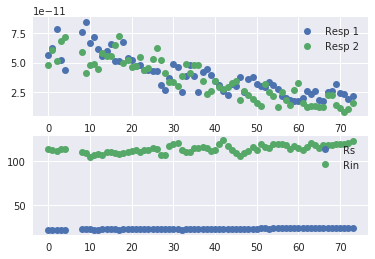

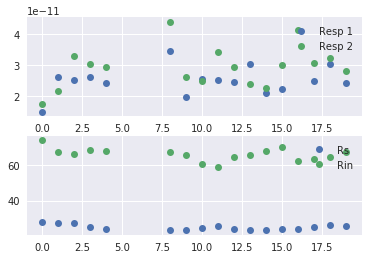

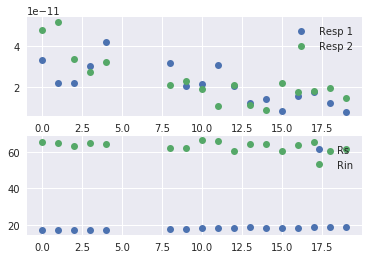

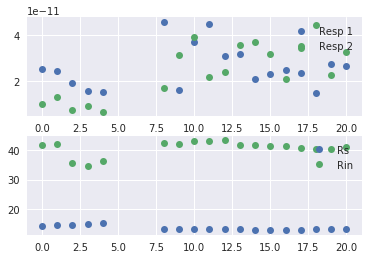

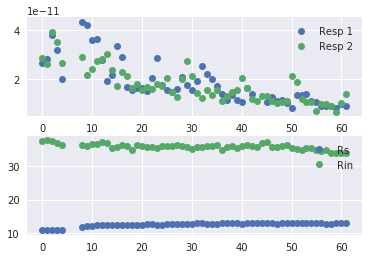

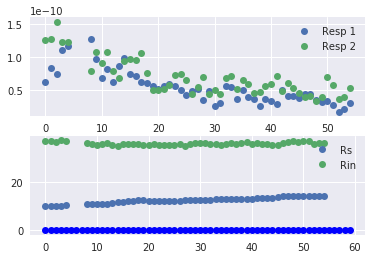

In [9]:
patch_pip.df_ana(data_asso_50Hz_reci,'/data/data_asso_50Hz_reci')
asso_50Hz_reci = pd.read_pickle('/data/data_asso_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [10]:
elimi = np.array([18, 60, 18, 18, 60, 50])
elimi_sr = pd.Series(elimi, index=asso_50Hz_reci.index)
asso_50Hz_reci['elimi']=elimi_sr
asso_50Hz_reci.to_pickle('/data/ana_asso_50Hz_reci')

<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


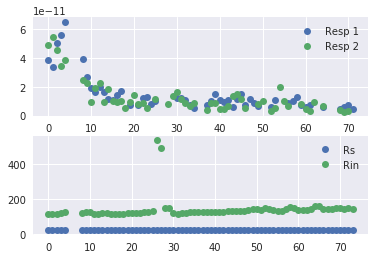

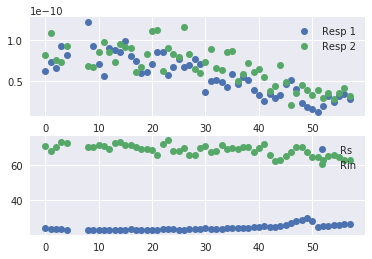

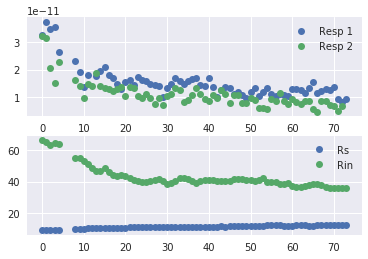

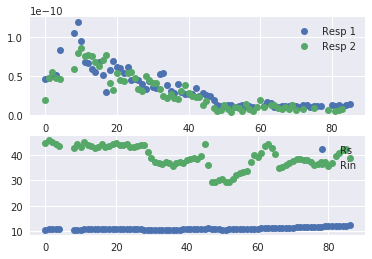

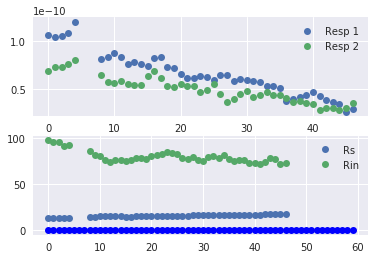

In [11]:
patch_pip.df_ana(data_asso_50Hz_uni,'/data/data_asso_50Hz_uni')
asso_50Hz_uni = pd.read_pickle('/data/data_asso_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [12]:
elimi = np.array([25,30,30,28,30])
elimi_sr = pd.Series(elimi, index=asso_50Hz_uni.index)
asso_50Hz_uni['elimi']=elimi_sr
asso_50Hz_uni.to_pickle('/data/ana_asso_50Hz_uni')